# Note for Defining Network Topologies that Can Achieve Biochemical Adaptation
Source: [Defining Network Topologies that Can Achieve Biochemical Adaptation](https://www.ncbi.nlm.nih.gov/pubmed/19703401)

## Summary

1. Problem statement: Many signaling systems show adaptation- the ability to reset themselves after responding to a stimulus. The authors use computational methods to search all possible three-node enzyme network topologies to identify those that could perform adaptation

2. Goal
    
    a. Despite the apparent complexity of cellular netowrks, there might only be a limited number of network topologies that are capable of robustly executing any particular biological function. Some topologies may be more favorable because of fewer parameter constraints.
    
    b. Organize ever-expanding database of biological networks by functionally classifying key motifs in a network. 
    
    c. Construct a unified function-topology mapping that captures the essential barebonew topologies under pinning the function.
    
    d. A circuit function-topology map would also be invaluable for synthetic biology, providing a manual for how to robustly engineer biological circuits that carry out a target function.

3. Results: only two major core topologies emerge as robust solutions:

    a. Negative feedback loop with a buffering node
    
    b. Incoherent feedforward loop with a proportioner node



<img src = "img/fig1.png" alt='graphical-abstract'> 
$$Figure 1.$$

## What and why is adaptation?

1. __What is adaptation__: Adaptation refers to the system's ability to respind to a change in input stimulus then return to its prestimulated output level, even when the change in input persists.

2. __Why is adaptation__: 
    a. Adaptation is commonly used in sensory and other signaling networks to expand the input range that a circuit is able to sense, to more accurately detect changes in the input.
    b. To maintain homeostasis in the presence of perturbations.

## Defining Adaptation 
See Figure 1.A
1. __Sensitivity__: the height of output response relative to the initial steady-state value $$Sensitivity = \lvert \frac{(O_{peak}-O_{1})/O_{1}}{(I_2-I_1)/I_1} \rvert$$

2. __Precision__: the inverse of difference between the pre- and poststimulus steady states $$Precision = \lvert \frac{(O_{2}-O_{1})/O_{1}}{(I_2-I_1)/I_1} \rvert^{-1}$$


## *Think Further: Why are there 16038 graphs?*

You may confused with Figure 1.B, and ask why there are 16038 valid graphs. Here is the reason:

Problem Setup:

1. The directed weighted graph $$G=(V,E)$$ $$V=\{A,B,C\}$$ $$E=\{W_{AA}, W_{AB}, W_{AC}, W_{BA}, W_{BB}, W_{BC}, W_{CA}, W_{CB}, W_{CC}\}$$ $$W=\{>0, =0, <0\}$$ where $V$ IS the vertex set, $E$ is the set of ordered pair and $W_{ij}$ is the weighted edge with direction from vertex i to vertex j.

2. A is the input node, and C is the output node.

3. Valid graphs: $$G_{Valid}=\{\text{There exists at least one path from A to C}\}$$ where $G_{Valid} \subset G$

Calculation by combination theory:

\begin{align}
\{\text{Valid Graphs}\}&= \text{\{All Graphs\}} - \{A \text{ not}\rightarrow C\} \\
&= \text{\{All Graphs\}} -( \{A \text{ not}\rightarrow C \cap A \rightarrow B \cap B \text{ not}\rightarrow C\} + \{A \text{ not}\rightarrow C \cap A \text{ not}\rightarrow B \cap B \rightarrow C\} + \{A \text{ not}\rightarrow C \cap A \text{ not}\rightarrow B \cap B \text{ not}\rightarrow C\}) \\
&= 3^{9} - 1 \times 2 \times 1 \times 3^{6} - 1 \times 2 \times 1 \times 3^{6} - 1 \times 1 \times 1 \times 3^{6} \\
&= 16038
\end{align}

## Experimental Design

1. Each node has a fixed total concentration that can be interconverted between active and inactive form. $$A\Longleftrightarrow (1-A)$$

2. __Assumptions__: the enzyme nodes operate under Michaelis-Mneten Kinetics and that they are noncooperative (Hill coefficient = 1)

3. __Define functional network__ (see Figure 1.):

    a. Senstivity > 1
    
    b. Precision > 10 
    
    c. $I_{1}=0.5$ (nonzero inital input); $I_{2}=0.6$ (20% change)

##  Results

1. None of two-node networks achieves adaptation

<img src = "img/fig2.png" alt='results'> 
$$Figure 2.$$

In [4]:
from sympy import *
init_printing()


In [5]:
# Symbols
i = symbols('I')
kia, Kia, fa, kfa, Kfa = symbols('k_{IA} K_{IA} F_{A} k^{\'}_{F_{A}A} K^{\'}_{F_{A}A}')
kcb, Kcb, fb, kfb, Kfb= symbols('k_{CB} K_{CB} F_{B} k^{\'}_{F_{B}B} K^{\'}_{F_{B}B}')              
kac, Kac, kbc, Kbc= symbols('k_{AC} K_{AC} k^{\'}_{BC} K^{\'}_{BC}')
t = symbols('t')

# Function (Nodes)
a = Symbol('A')
b = Symbol('B')
c = Symbol('C')

# Equation
eqa = Eq(diff(a(t),t), 
         i * kia(1-a(t))/( (1-a(t)) + Kia) - fa*kfa*(a(t)/(a(t)+Kfa)))
eqb = Eq(diff(b(t),t), 
         c(t) * kcb * (1-b(t))/((1-b(t))+Kcb) - fb * kfb * b(t) / (b(t) + Kfb) )
eqc = Eq(diff(c(t),t), 
         a(t) * kac * (1-c(t))/((1-c(t))+ Kac) - b(t) * kbc * c(t)/ (c(t)+Kbc) ) 

sys = [eqa, eqb, eqc]

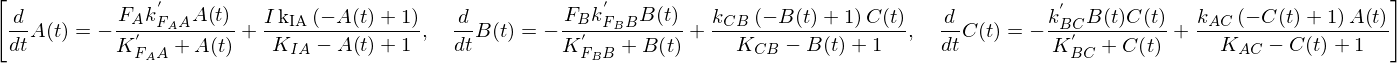

In [6]:
sys

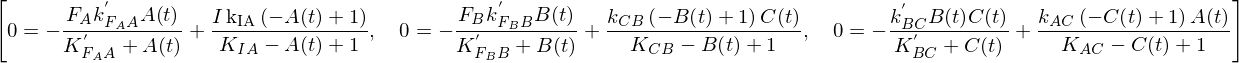

In [57]:
seqa = Eq(0, 
         i * kia(1-a(t))/( (1-a(t)) + Kia) - fa*kfa*(a(t)/(a(t)+Kfa)))
seqb = Eq(0, 
         c(t) * kcb * (1-b(t))/((1-b(t))+Kcb) - fb * kfb * b(t) / (b(t) + Kfb) )
seqc = Eq(0, 
         a(t) * kac * (1-c(t))/((1-c(t))+ Kac) - b(t) * kbc * c(t)/ (c(t)+Kbc) ) 
sys_steady = [seqa, seqb, seqc]
sys_steady

[Sympy dsolve](http://josephcslater.github.io/differential_equation_solution_sympy.html)

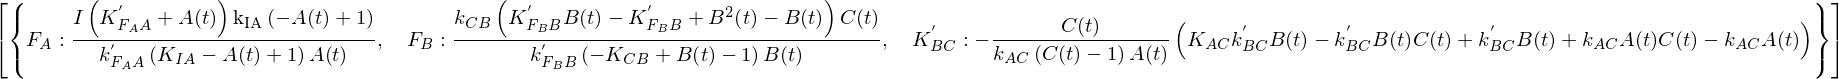

In [64]:
soln = solve((seqa, seqb, seqc))
soln

In [ ]:
def system(a,b,c)